In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [2]:
all_train = pd.read_csv("C:/project/final_data/merged_all/train.tsv", sep="\t")
all_train

,idx,text_left,text_right,label
0,0,lg 24 ' lds4821ww semi integrated built in whi...,lg ldf6920bb fully integrated dishwasher,0
1,1,speck seethru clear hard shell case for macboo...,speck products seethru case for apple 13 ' mac...,0
2,2,denon blu-ray disc dvd/cd player dvd3800bdci 1...,denon dvd-2930ci dvd player dvd2930ci dvd + rw...,0
3,3,panasonic dect 6.0 expandable digital cordless...,panasonic kx-tg1032s dual handset digital cord...,0
4,4,sony silver minidv handycam camcorder dcrhc52 ...,sony minidv head cleaner dvm12cld head cleaner,0
...,...,...,...,...
43717,43717,gear head wireless optical tilt-wheel mouse re...,gear head 2.4 ghz mini wireless desktop and op...,0
43718,43718,cables to go usb 2.0 a b cable 9 feet white ca...,cables unlimited usb-5010-03m usb 2.0 a to b c...,0
43719,43719,epson t060320 ink cartridge magenta printers e...,epson 78 yellow ink cartridge t078420 t078420 ...,0
43720,43720,crown industrial deck plate antifatigue vinyl ...,new-crown cd0035db - industrial deck plate ant...,0


In [4]:
def cp(C,D):
    cend=[]
    a=-1
    b=-1
    m=-1
    n=-1
    target=-1
    if C==''or D=='':
        s=1   
    else:
        for i in range(len(C)):
            t=1
            for j in range(len(D)):
                if C[i]== D[j]:
                    a=i
                    b=j
                    m=a
                    n=b
                while m < len(C) and n<len(D) and C[a:m+1]==D[b:n+1]:
                    m=m+1
                    n=n+1
                long=m-a
                if long >= t:
                    t = long
                    target = m
            
            x=target-1
            y=n-1
            if b <len(D) and C[i]==D[b] :
                cend.append(x)
            else:
                cend.append(i)
        s_AB = len(set(cend))
        z = C.find(D);
        if z!=-1:
            ss=s_AB-1;
        else:
            ss = s_AB
        s=ss/len(C)    
    return s

In [5]:
def distCPD(C,D):
    s1 = cp(C,D);
    s2 = cp(D,C);
    dist = 0.5*(s1+s2);
    return dist

In [6]:
def toInt(list):
    result = []
    for i in range(len(list)):
        b = int(list[i])
        result.append(b)
    return result

In [7]:
def getDistance(list_text1, list_text2):
    dist = []
    if len(list_text1)!=len(list_text2):
        return("error")
    n = len(list_text1)
    for i in range(n):
        d = distCPD(list_text1[i],list_text2[i])
        dist.append(d)
    return dist

In [8]:
dist_train = getDistance(all_train['text_left'], all_train['text_right'])

In [9]:
def prediction(dist_list, threshold):
    pre_list = [0]*len(dist_list)
    for i in range(len(dist_list)):
        if dist_list[i]<threshold:
            pre_list[i] = 1
    return pre_list

In [10]:
threshold_list = np.linspace(0,1,101)
real = toInt(all_train['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.0003072668612690121
0.0021488871834228706
0.015248551387618174
0.04005420870350851
0.07596807567248005
0.10972423802612483
0.14409796383311974
0.1826547685443391
0.2197952218430034
0.2653196862953609
0.3098409414198888
0.352896725440806
0.39985344406448464
0.4445760303173851
0.49025005735260385
0.5271611823759064
0.5637409135293479
0.5953537486800422
0.6273947341460916
0.6507635492564128
0.6748251748251748
0.6960219219502977
0.7142462473524267
0.7284448025785656
0.7398813677599442
0.7490242660783981
0.7531477799867463
0.7558092787649754
0.7550463720676486
0.7496027241770716
0.7410832232496697
0.7323304002270791
0.7210865688023047
0.7068965517241379
0.6920176391640571
0.6765721331689272
0.6589820890228764
0.6419879449562153
0.6262714645083671
0.6073243568921255
0.5906532663316584
0.5734245519367894
0.5534463693328419
0.5347136563876652
0.5147225605914226
0.4933860848019822
0.47084216903968495
0.4483166612885877
0.4242281086553062
0.4030236341019998
0.3831919582213904
0.36392179249

In [11]:
print(max_f)
print(max_t)

0.7558092787649754
0.28


In [12]:
all_test = pd.read_csv("C:/project/final_data/merged_all/test.tsv", sep="\t")
all_test

,idx,text_left,text_right,label
0,0,sony pink cyber-shot 7.2 megapixel digital cam...,olympus fe-360 digital camera pink 226540 8 me...,0
1,1,lg 2.0 cu . ft. over-the-range white microwave...,maytag 2.0 cu . ft. over-the-range microwave oven,0
2,2,panasonic black 8.5 ' portable dvd player dvdl...,toshiba sd-p71s portable dvd player toshiba sd...,0
3,3,sony bravia theater black micro system davis50...,sony bravia dav-is50 / b home theater system d...,1
4,4,panasonic dect 6.0 expandable digital cordless...,panasonic kx-tg9342t cordless phone 1 x phone ...,0
...,...,...,...,...
14577,14577,lexar platinum ii 16gb sd sdhc memory card lex...,lexar lcf4gbbsbna200 platinum ii 4 gb 200x com...,0
14578,14578,da-lite video spectra 1.5 advantage manual wit...,da-lite advantage manual with csr - projection...,0
14579,14579,da-lite da-plex unframed rear projection scree...,da-lite 27651 da-glas deluxe rear projection s...,0
14580,14580,rca cassette adapter mp3 accessories ah760r 12...,rca vca115 vhs-c cassette adapter blank media ...,0


In [13]:
dist_test = getDistance(all_test['text_left'], all_test['text_right'])

In [14]:
real_test = toInt(all_test['label'])
pre_list = prediction(dist_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.7583212735166425


[[12008   400]
 [  602  1572]]
[12008   400   602  1572]


Text(66.5, 0.5, 'True')

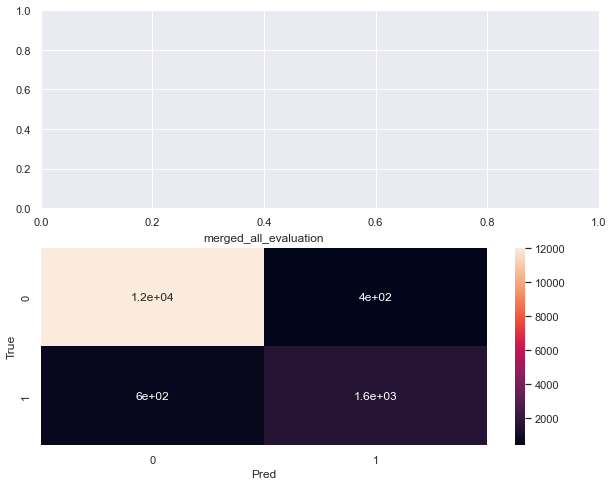

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('merged_all_evaluation')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [16]:
print("\nDetails of merged_all =\n",classification_report(real_test, pre_list))


Details of merged_all =
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     12408
           1       0.80      0.72      0.76      2174

    accuracy                           0.93     14582
   macro avg       0.87      0.85      0.86     14582
weighted avg       0.93      0.93      0.93     14582



In [17]:
clean_train = pd.read_csv("C:/project/final_data/merged_clean/train.tsv", sep="\t")
clean_train

,idx,text_left,text_right,label
0,0,lg 24 ' lds4821ww semi integrated built in whi...,lg ldf6920bb fully integrated dishwasher,0
1,1,speck seethru clear hard shell case for macboo...,speck products seethru case for apple 13 ' mac...,0
2,2,denon blu-ray disc dvd/cd player dvd3800bdci 1...,denon dvd-2930ci dvd player dvd2930ci dvd + rw...,0
3,3,panasonic dect 6.0 expandable digital cordless...,panasonic kx-tg1032s dual handset digital cord...,0
4,4,sony silver minidv handycam camcorder dcrhc52 ...,sony minidv head cleaner dvm12cld head cleaner,0
...,...,...,...,...
12612,12612,microsoft visual studio team suite 2005 with m...,f1q-00302 microsoft visual studio 2005 profess...,0
12613,12613,microsoft word 2004 upgrade ( mac ) microsoft ...,microsoft b21-00806 ae mappoint 2006 cd 50.39,0
12614,12614,adobe after effects professional 7.0 adobe 999.0,15510669dm adobe after effects cs3 professiona...,0
12615,12615,system care professional avanquest 49.95,microsoft office and windows training professi...,0


In [18]:
dist_train = getDistance(clean_train['text_left'], clean_train['text_right'])

In [19]:
threshold_list = np.linspace(0,1,101)
real = toInt(clean_train['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.001519756838905775
0.001519756838905775
0.001519756838905775
0.003037205770690964
0.006065200909780136
0.012066365007541479
0.016541353383458645
0.02544910179640719
0.03134328358208956
0.047337278106508875
0.06309611151870874
0.07569141193595341
0.09763101220387653
0.11997177134791813
0.1309192200557103
0.151742993848257
0.169811320754717
0.17916390179163902
0.196870925684485
0.2120051085568327
0.23900928792569662
0.2515188335358445
0.2742316784869976
0.29381735677821896
0.3122594832325454
0.32642211589580017
0.3415637860082305
0.3584441161989168
0.37375178316690444
0.37965485921889197
0.3846153846153846
0.39267886855241263
0.40158102766798415
0.3990980834272829
0.4000000000000001
0.40459304289091524
0.40606251973476476
0.4088069027075275
0.40809443507588533
0.4095490716180371
0.408842523596622
0.4037339556592765
0.3959834097358655
0.39036341363821964
0.38098873830883756
0.367237687366167
0.3546453546453546
0.33903045369794904
0.32373788514393176
0.3120316119362311
0.299232736572

In [20]:
print(max_f)
print(max_t)

0.4095490716180371
0.4


In [21]:
clean_test = pd.read_csv("C:/project/final_data/merged_clean/test.tsv", sep="\t")
clean_test

,idx,text_left,text_right,label
0,0,sony pink cyber-shot 7.2 megapixel digital cam...,olympus fe-360 digital camera pink 226540 8 me...,0
1,1,lg 2.0 cu . ft. over-the-range white microwave...,maytag 2.0 cu . ft. over-the-range microwave oven,0
2,2,panasonic black 8.5 ' portable dvd player dvdl...,toshiba sd-p71s portable dvd player toshiba sd...,0
3,3,sony bravia theater black micro system davis50...,sony bravia dav-is50 / b home theater system d...,1
4,4,panasonic dect 6.0 expandable digital cordless...,panasonic kx-tg9342t cordless phone 1 x phone ...,0
...,...,...,...,...
4204,4204,instant immersion german audio topics entertai...,instant immers french dlx 2 27.57,0
4205,4205,adobe flash pro cs3 [ mac ] adobe 699.0,38039295dm adobe flash cs3 professional v. 9 m...,0
4206,4206,let 's learn about time & date selectsoft publ...,it 's about time products learn the switch to ...,0
4207,4207,quicken legal business pro 2007 nolo press 79.99,quickbooks ( r ) pro 2007 179.99,0


In [22]:
dist_test = getDistance(clean_test['text_left'], clean_test['text_right'])

In [23]:
real_test = toInt(clean_test['label'])
pre_list = prediction(dist_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.4244372990353698


[[3229  540]
 [ 176  264]]
[3229  540  176  264]


Text(66.5, 0.5, 'True')

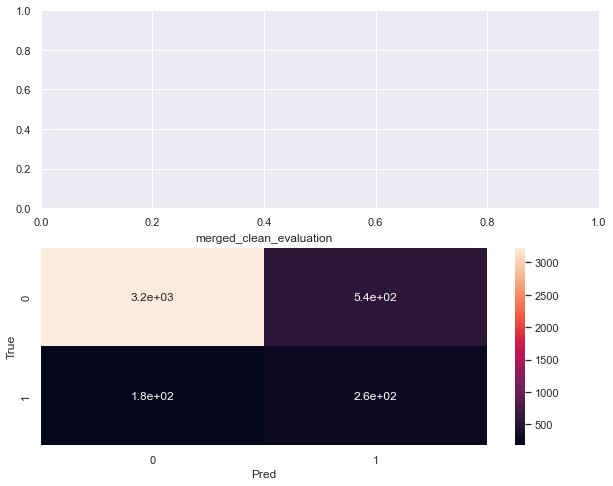

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('merged_clean_evaluation')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [25]:
print("\nDetails of merged_clean =\n",classification_report(real_test, pre_list))


Details of merged_clean =
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      3769
           1       0.33      0.60      0.42       440

    accuracy                           0.83      4209
   macro avg       0.64      0.73      0.66      4209
weighted avg       0.88      0.83      0.85      4209



In [26]:
dirty_train = pd.read_csv("C:/project/final_data/merged_dirty/train.tsv", sep="\t")
dirty_train

,idx,text_left,text_right,label
0,0,Illusion ( feat . Echosmith ) Zedd True Colors...,Transmission [ feat . X Ambassadors ] Dance & ...,0
1,1,I 'm a Machine ( feat . Crystal Nicole and Tyr...,I Can Only Imagine ( feat . Chris Brown & Lil ...,0
2,2,Silver and Gold 3:33 Little Big Town Pain Kill...,Silver And Gold Little Big Town Country ( C ) ...,1
3,3,Dangerous ( feat . Sam Martin ) [ Robin Schulz...,I 'll Keep Loving you ( feat . Birdy & Jaymes ...,0
4,4,True Colors ( feat . Nicki Minaj ) Wiz Khalifa...,Still Down ( feat . Chevy Woods & Ty Dolla $ i...,0
...,...,...,...,...
31100,31100,gear head wireless optical tilt-wheel mouse re...,gear head 2.4 ghz mini wireless desktop and op...,0
31101,31101,cables to go usb 2.0 a b cable 9 feet white ca...,cables unlimited usb-5010-03m usb 2.0 a to b c...,0
31102,31102,epson t060320 ink cartridge magenta printers e...,epson 78 yellow ink cartridge t078420 t078420 ...,0
31103,31103,crown industrial deck plate antifatigue vinyl ...,new-crown cd0035db - industrial deck plate ant...,0


In [27]:
dist_train = getDistance(dirty_train['text_left'], dirty_train['text_right'])

In [28]:
threshold_list = np.linspace(0,1,101)
real = toInt(dirty_train['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.0
0.0023081361800346223
0.018695154521175122
0.04921111945905334
0.09289517165412155
0.1329978432782171
0.17389776919023361
0.21864290610006853
0.26198830409356727
0.3130772970345163
0.3626373626373626
0.41090466037161133
0.4618101545253864
0.5100327308951188
0.5611095852787696
0.6003732338043188
0.6393379024957973
0.6741177948009546
0.7076698675094202
0.7320477936827162
0.7559036977306763
0.7778896721494909
0.7954619832006108
0.8099085689985117
0.8205287713841369
0.8292781423523472
0.8321484992101105
0.8333653661349223
0.8297912005965696
0.8235721420139835
0.8130181689892397
0.8021902806297057
0.7881806108897743
0.7728480553989855
0.7559398613383188
0.7373105060713478
0.7172363636363638
0.6970826010544816
0.6789788158609451
0.656003133772932
0.6367645205997228
0.6175702750288385
0.5955732056298545
0.5744298393438939
0.5524558380008617
0.529790411452701
0.5050485246544456
0.48109997669540905
0.45480151395123664
0.4308320146581161
0.40913581222586637
0.3879300662648347
0.368196674

In [29]:
print(max_f)
print(max_t)

0.8333653661349223
0.28


In [30]:
dirty_test = pd.read_csv("C:/project/final_data/merged_dirty/test.tsv", sep="\t")
dirty_test

,idx,text_left,text_right,label
0,0,Elevator ( feat . Timbaland ) Flo Rida Mail On...,Money Right ( feat . Rick Ross & Brisco ) [ Ex...,0
1,1,The Woodland Realm ( Extended Version ) Howard...,The High Fells ( Extended Version ) The Hobbit...,0
2,2,Extra Extra Credit Wiz Khalifa Flight School $...,Extra Extra Credit [ Explicit ] Wiz Khalifa 20...,1
3,3,Toyfriend ( feat . Wynter Gordon ) [ Continuou...,Sound Of Letting Go ( Feat . Chris Willis ) Da...,0
4,4,Dangerous ( feat . Sam Martin ) [ Robin Schulz...,Missing You ( Feat . Novel ; Continuous Mix Ve...,0
...,...,...,...,...
10368,10368,lexar platinum ii 16gb sd sdhc memory card lex...,lexar lcf4gbbsbna200 platinum ii 4 gb 200x com...,0
10369,10369,da-lite video spectra 1.5 advantage manual wit...,da-lite advantage manual with csr - projection...,0
10370,10370,da-lite da-plex unframed rear projection scree...,da-lite 27651 da-glas deluxe rear projection s...,0
10371,10371,rca cassette adapter mp3 accessories ah760r 12...,rca vca115 vhs-c cassette adapter blank media ...,0


In [31]:
dist_test = getDistance(dirty_test['text_left'], dirty_test['text_right'])

In [32]:
real_test = toInt(dirty_test['label'])
pre_list = prediction(dist_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.8343416882742726


[[8350  289]
 [ 286 1448]]
[8350  289  286 1448]


Text(66.5, 0.5, 'True')

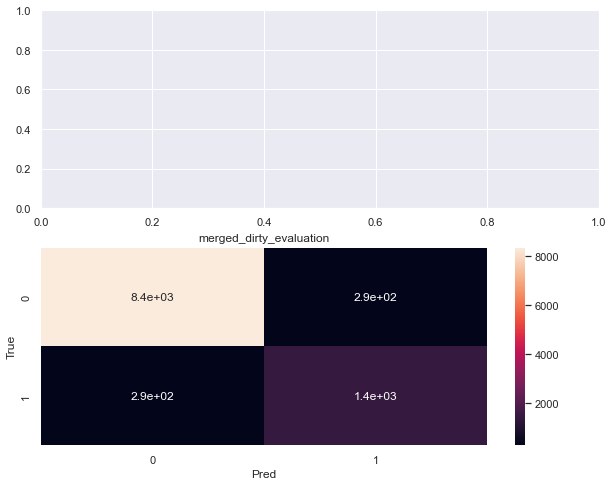

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('merged_dirty_evaluation')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [34]:
print("\nDetails of merged_dirty =\n",classification_report(real_test, pre_list))


Details of merged_dirty =
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      8639
           1       0.83      0.84      0.83      1734

    accuracy                           0.94     10373
   macro avg       0.90      0.90      0.90     10373
weighted avg       0.94      0.94      0.94     10373

